## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

Значение интеграла:  
$$
\frac{2}{3}
$$

2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [51]:
import numpy as np
from scipy import special as sp

def f(x):
    
    return 7*x**3 - 8*x**2 - 2*x + 3

def I(f, a, b, rtol):
    
    n = 1
    I0 = float('inf')
    s0=[]
    
    while True: 
        
        step = (b - a) / n
        nodes = np.arange(a + step / 2, b, step)
        
        S = sum(f(node) for node in nodes)
        I = step*S
    
        if np.abs(I - I0) < rtol:
            break
            
        I0 = I
        n = n*2
        
    return (I, n)


print('Значение интеграла: %.10f, Количество узлов: %i' %I(f, -1, 1, 1e-10))


Значение интеграла: 0.6666666667, Количество узлов: 524288


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [46]:
for i in range(1, 7):
    nodes, weights = sp.roots_legendre(i)
    print('Значение интеграла: %.10f, Количество узлов: %i \n' % (sum(weights * f(nodes)), i))


Значение интеграла: 6.0000000000, Количество узлов: 1 

Значение интеграла: 0.6666666667, Количество узлов: 2 

Значение интеграла: 0.6666666667, Количество узлов: 3 

Значение интеграла: 0.6666666667, Количество узлов: 4 

Значение интеграла: 0.6666666667, Количество узлов: 5 

Значение интеграла: 0.6666666667, Количество узлов: 6 



Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

Очевидно, метод Гауссовых квадратур позволяет достигнуть конкурентной обычному методу интегрирования точности за много меньшее
количество узлов (6 против полумиллиона), поэтому использовать лучше его.

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

Значение интеграла:
$$
I = \int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx = \frac{44140}{3}
$$


 Выполним афинное преобразование:
$$ 
u = \frac{x}{5} - 1 \rightarrow du = \frac{dx}{5}
$$
Тогда интеграл перепишется в виде:
$$
I = 5 \int_{-1}^{1}(875(u+1)^3 - 200(u+1)^2 - 15 (u+1) + 3)du
$$

In [50]:
def f1(u):
    return 5*(875*(u+1)**3 - 200*(u+1)**2 - 15*(u+1) + 3)


def I1(f, rtol):
    
    n = 1
    
    while True:
        
        nodes, weights = sp.roots_legendre(n)
        I = sum(weights * f(nodes))
        
        if  abs( 44140/3 - I) < rtol:  #сравниваем с точным значением
            break
     
        n = n + 1
    
    return I, n

print ('Значение интеграла: %.10f, Количество узлов %i' %I1(f1, 1e-10))

Значение интеграла: 14713.3333333333, Количество узлов 2


Сравните результат с точным значением интеграла.

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

Вводя замену 
$$
u = \frac{x}{2\pi} \rightarrow du = \frac{dx}{2\pi}
$$ \
Сводим интеграл к:
$$
I = \int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}} = \int_{0}^{1} \frac{cos(2\pi u) du }{\sqrt{1 - u^2}}
$$ \
поскольку подынтегральная функция четная, интеграл можно переписать в виде:
\
$$ 
I = \frac{1}{2} \int_{-1}^{1} \frac{cos(2\pi u) du }{\sqrt{1 - u^2}}
$$


Подходящий базис - полиномы Чебышева первого рода:

In [54]:
def f2(u):
    return np.cos(2 * np.pi * u) / 2

def I2(f):
    
    n = 1
    I0 = float('inf')
    
    while True:
        
        nodes, weights = sp.roots_chebyt(n)
        I = sum(weights * f(nodes))
        
        if (abs(I0 - I) == 0):
            break
            
        I0 = I
        n = n + 1
    return I, n
    
print('Значение интеграла: %.10f, Количество узлов: %i \n' % (I2(f2)))

Значение интеграла: 0.3460101588, Количество узлов: 19 



## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

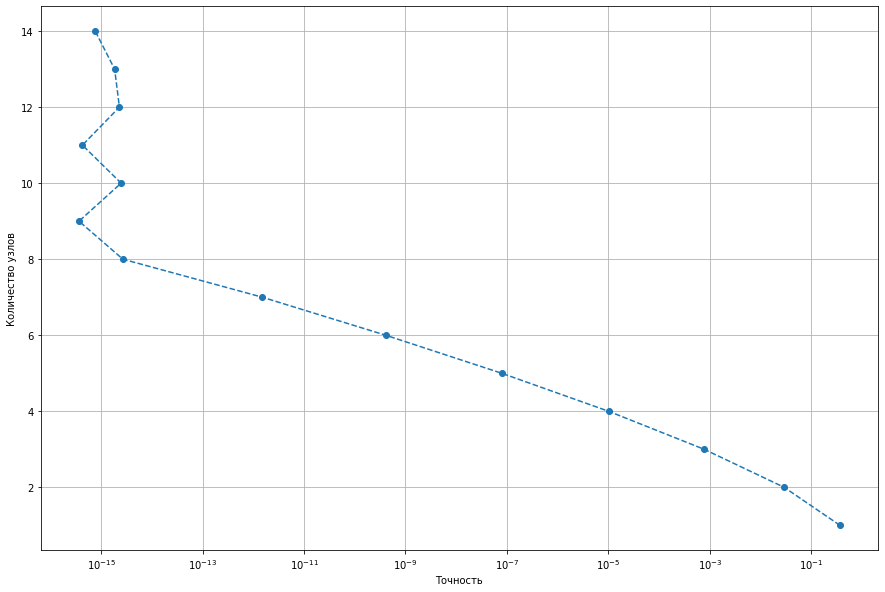

In [124]:
def f3(x):
    return np.sin(np.pi*x) + 2/np.pi

def d(n):
    
    nodes, weights = sp.roots_sh_legendre(n) 
    
    v = np.linalg.solve (weights*1/2*np.ones([n,n])-np.eye(n), -np.sin(np.pi*nodes))
    
    return nodes, v

x = []
y = []

for i in range(1,15):
    
    x.append(i)
    node, v = d(i)
    diff = np.linalg.norm(f3(node)-v)
    y.append(diff)

plt.figure(figsize=(15, 10)) 
plt.semilogx(y, x, '--o', )
plt.grid()
plt.xlabel('Точность')
plt.ylabel('Количество узлов')
plt.show()


Отсюда видно что по достижении 9 узлов, норма разности перестаёт расти, а значит что значение N больше 9 будет излишней роскошью 

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

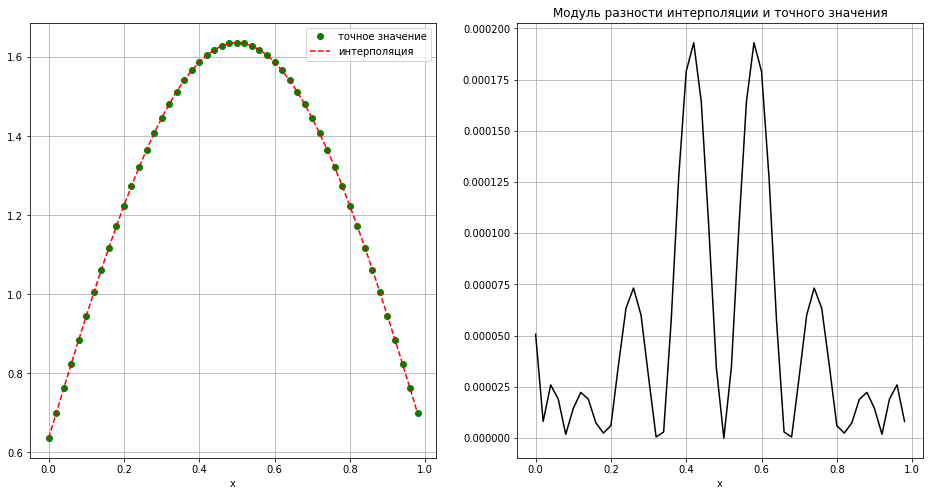

In [198]:
from scipy import interpolate as ip

m = np.arange(0, 1, 1/50)

yr = []
for i in m:
    yr.append(f3(i))
yr1 = np.array(yr)
    
nodes, v = d(9)
interp = ip.splrep(nodes, v)
yi = ip.splev(m, interp)

plt.figure(figsize = (16, 8))

plt.subplot(121)
plt.grid()
plt.xlabel('x')
plt.plot(m, yr1, 'o', label = 'точное значение', color = 'g')
plt.plot(m, yi, '--', label = 'интерполяция' , color = 'r')
plt.legend()

plt.subplot(122)
plt.grid()
plt.xlabel('x')
plt.title('Модуль разности интерполяции и точного значения')
plt.plot(m, abs(yi - yr1), color = 'k')

plt.show()

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

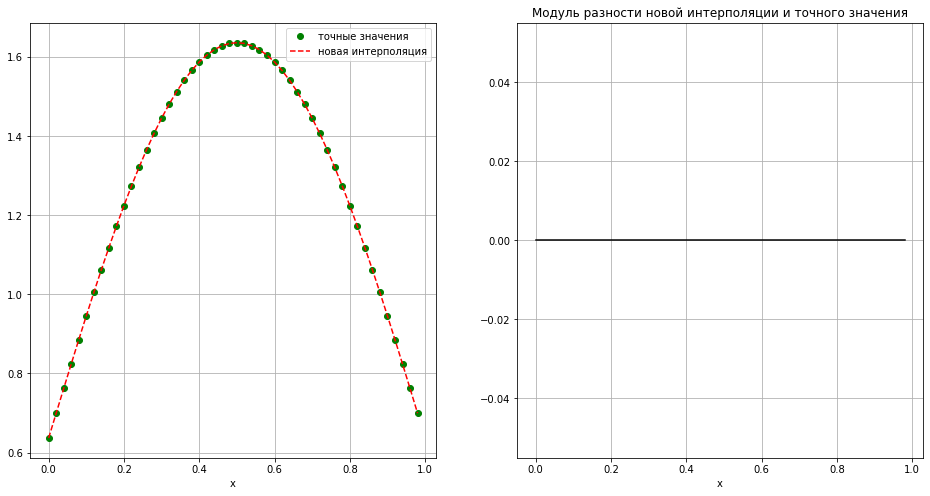

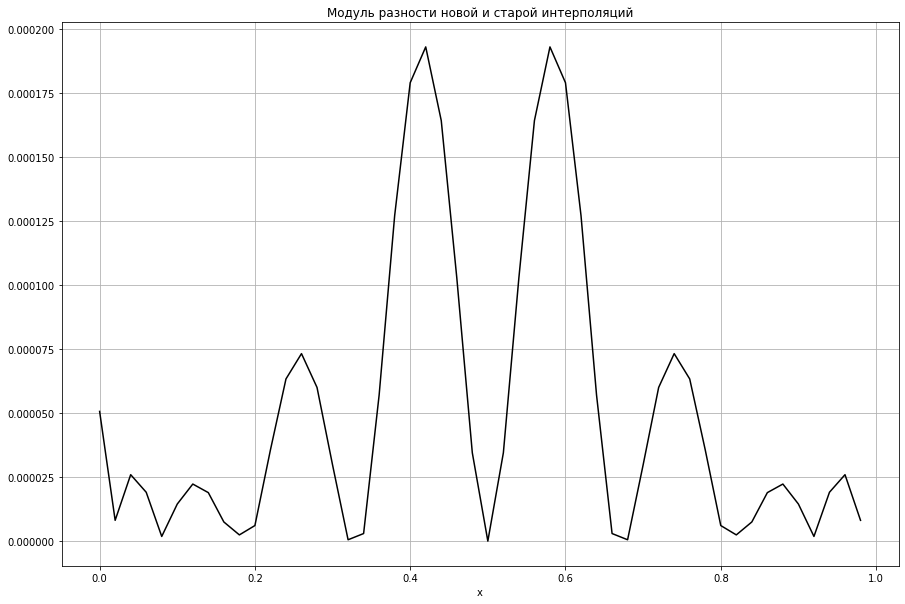

In [226]:
def f4(x, v):
    n = v.shape[0]
    weights = sp.roots_sh_legendre(n)[1]
    return np.sin(np.pi*x)+(1/2*weights @ v)

plt.figure(figsize = (16, 8))

plt.subplot(121)
plt.grid()
plt.xlabel('x')
plt.plot(m, f3(m), 'o', label = 'точные значения', color = 'g')
plt.plot(m, f4(m, v), "--", label = "новая интерполяция", color = 'r')
plt.legend()


plt.subplot(122)
plt.grid()
plt.xlabel('x')
plt.plot(m, abs(f4(m, v) - yr1), color = 'k')
plt.title('Модуль разности новой интерполяции и точного значения')


plt.figure(figsize = (15, 10))
plt.grid()
plt.xlabel('x')
plt.plot(m, abs(f4(m, v) - yi), color = 'k')
plt.title('Модуль разности новой и старой интерполяций')

plt.show()
